In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import numpy as np, random
from sklearn.metrics import precision_recall_fscore_support
import math, seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline

In [2]:
df4 = pd.read_csv('Persistent_vs_NonPersistent.csv')
df4.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Com

In [3]:
len(df4.columns)

69

In [4]:
df4

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


In [5]:
for column in df4.columns:
    print(column, len(df4[column].unique()))

Ptid 3424
Persistency_Flag 2
Gender 2
Race 4
Ethnicity 3
Region 5
Age_Bucket 4
Ntm_Speciality 36
Ntm_Specialist_Flag 2
Ntm_Speciality_Bucket 3
Gluco_Record_Prior_Ntm 2
Gluco_Record_During_Rx 2
Dexa_Freq_During_Rx 58
Dexa_During_Rx 2
Frag_Frac_Prior_Ntm 2
Frag_Frac_During_Rx 2
Risk_Segment_Prior_Ntm 2
Tscore_Bucket_Prior_Ntm 2
Risk_Segment_During_Rx 3
Tscore_Bucket_During_Rx 3
Change_T_Score 4
Change_Risk_Segment 4
Adherent_Flag 2
Idn_Indicator 2
Injectable_Experience_During_Rx 2
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms 2
Comorb_Encounter_For_Immunization 2
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx 2
Comorb_Vitamin_D_Deficiency 2
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified 2
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx 2
Comorb_Long_Term_Current_Drug_Therapy 2
Comorb_Dorsalgia 2
Comorb_Personal_History_Of_Other_Diseases_And_Conditions 2
Comorb_Other_Disorders_Of_Bone_Density_And_Structure 2
Comorb_Disorders_of_lipoprotei

In [6]:
df4.corr

<bound method DataFrame.corr of        Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
0        P1       Persistent    Male      Caucasian  Not Hispanic     West   
1        P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2        P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3        P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4        P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
...     ...              ...     ...            ...           ...      ...   
3419  P3420       Persistent  Female      Caucasian  Not Hispanic    South   
3420  P3421       Persistent  Female      Caucasian  Not Hispanic    South   
3421  P3422       Persistent  Female      Caucasian  Not Hispanic    South   
3422  P3423   Non-Persistent  Female      Caucasian  Not Hispanic    South   
3423  P3424   Non-Persistent  Female      Caucasian  Not Hispanic    South   

     Age_Bucket        Ntm_Spec

In [7]:
nulls = df4.isnull().any()
for i in range(len(nulls)): 
    if nulls[i] == True : print(nulls[i])
# No null values in the dataset

<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

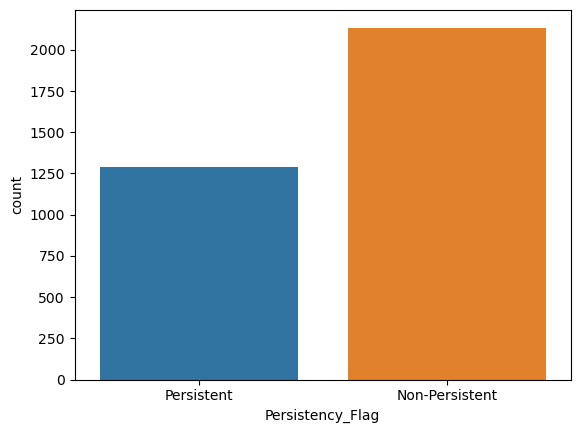

In [8]:
#Plotting Persistent vs NonPersistent values count
sns.countplot(x = "Persistency_Flag", data = df4)

In [9]:
df = pd.get_dummies(df4) # predict
df

,Dexa_Freq_During_Rx,Count_Of_Risks,Ptid_P1,Ptid_P10,Ptid_P100,Ptid_P1000,Ptid_P1001,Ptid_P1002,Ptid_P1003,Ptid_P1004,...,Risk_Excessive_Thinness_N,Risk_Excessive_Thinness_Y,Risk_Hysterectomy_Oophorectomy_N,Risk_Hysterectomy_Oophorectomy_Y,Risk_Estrogen_Deficiency_N,Risk_Estrogen_Deficiency_Y,Risk_Immobilization_N,Risk_Immobilization_Y,Risk_Recurring_Falls_N,Risk_Recurring_Falls_Y
0,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
2,0,2,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3420,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3421,7,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3422,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [10]:
X = df4.drop(columns='Persistency_Flag')
y = df4['Persistency_Flag']

In [11]:
led = LabelEncoder()
y1 = led.fit_transform(np.ravel(y))
y1 # Label Encoded target attribute
# Persistent - 1; NonPersistent - 0

array([1, 0, 0, ..., 1, 0, 0])

In [12]:
df = df4.drop('Persistency_Flag', axis = 1)

In [13]:
#Performing LabelEncoder for all the non-numeric columns of the dataframe
non_numeric_columns = df.select_dtypes(exclude=['float', 'int']).columns.tolist()
print(non_numeric_columns)
# Apply LabelEncoder to each non-numeric column
for i in non_numeric_columns:
    led = LabelEncoder()
    df[i] = led.fit_transform(df[i].astype(str))

['Ptid', 'Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment', 'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx', 'Comorb_Vitamin_D_Deficiency', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 'Comorb_Disorders_of_lipoprotein_metabolis

In [14]:
df

,Ptid,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,0,1,2,1,4,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1111,1,1,1,4,0,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2222,0,3,0,0,1,5,0,1,0,...,0,1,0,0,0,0,0,0,0,2
3,2758,0,2,1,0,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,2869,0,2,1,0,3,5,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,2691,0,2,1,3,3,5,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3420,2692,0,2,1,3,3,34,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3421,2693,0,2,1,3,3,3,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3422,2694,0,2,1,3,0,34,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
train_X, test_X, train_y, test_y = train_test_split(df, y1, test_size=0.2, random_state=42)

'Log Reg Precision: 0.8245614035087719'

'Log Reg Recall: 0.8723897911832946'

'Log Reg F1: 0.8478015783540023'

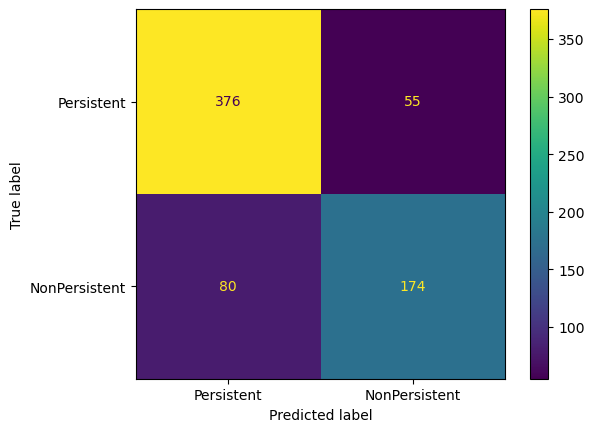

In [16]:
# Logistic Regression
# fit a model
model = LogisticRegression(solver='newton-cg')#, max_iter=3000, penalty='elasticnet',l1_ratio=1)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
p, r, f, s = precision_recall_fscore_support(test_y,y_pred)
display("Log Reg Precision: {}".format(p[0]))
display("Log Reg Recall: {}".format(r[0]))
display("Log Reg F1: {}".format(f[0]))

confusion_matrix = metrics.confusion_matrix(test_y, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Persistent', 'NonPersistent'])
cm_display.plot()
plt.show()

'Log Reg Precision: 0.9316546762589928'

'Log Reg Recall: 0.6009280742459396'

'Log Reg F1: 0.7306064880112835'

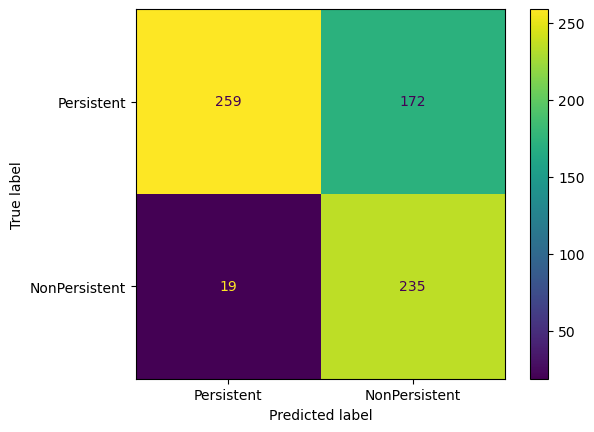

In [17]:
logReg = LogisticRegression(class_weight={0: 0.16, 1: 0.84}, solver='newton-cg')#'liblinear')
logReg.fit(train_X, train_y)
y_pred = logReg.predict(test_X)
p, r, f, s = precision_recall_fscore_support(test_y,y_pred)
display("Log Reg Precision: {}".format(p[0]))
display("Log Reg Recall: {}".format(r[0]))
display("Log Reg F1: {}".format(f[0]))

confusion_matrix = metrics.confusion_matrix(test_y, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Persistent', 'NonPersistent'])
cm_display.plot()
plt.show()

'Log Reg Precision: 0.9285714285714286'

'Log Reg Recall: 0.6032482598607889'

'Log Reg F1: 0.7313642756680732'

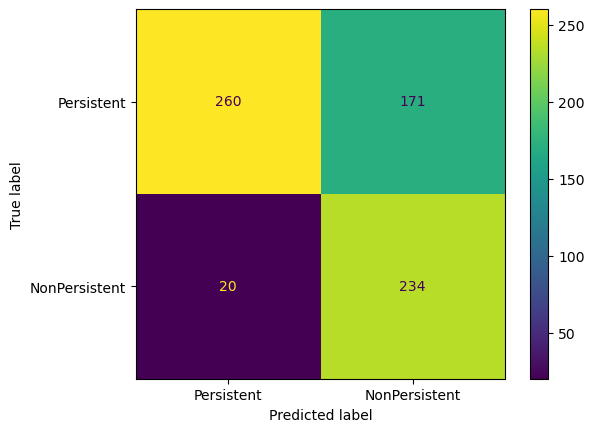

In [18]:
logReg1 = LogisticRegression(class_weight={0: 0.16, 1: 0.84}, solver='liblinear')
logReg1.fit(train_X, train_y)
y_pred = logReg1.predict(test_X)
p, r, f, s = precision_recall_fscore_support(test_y,y_pred)
display("Log Reg Precision: {}".format(p[0]))
display("Log Reg Recall: {}".format(r[0]))
display("Log Reg F1: {}".format(f[0]))
confusion_matrix = metrics.confusion_matrix(test_y, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Persistent', 'NonPersistent'])
cm_display.plot()
plt.show()

'Log Reg Precision: 0.8219780219780219'

'Log Reg Recall: 0.8677494199535963'

'Log Reg F1: 0.8442437923250563'

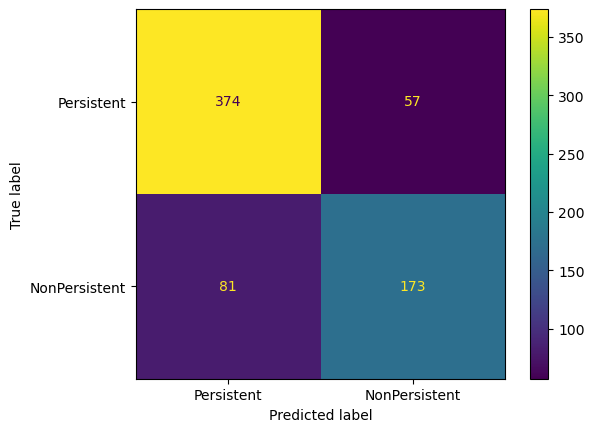

In [19]:
model1 = LogisticRegression(solver='liblinear')#, max_iter=3000, penalty='elasticnet',l1_ratio=1)
model1.fit(train_X, train_y)
y_pred = model1.predict(test_X)
p, r, f, s = precision_recall_fscore_support(test_y,y_pred)
display("Log Reg Precision: {}".format(p[0]))
display("Log Reg Recall: {}".format(r[0]))
display("Log Reg F1: {}".format(f[0]))
confusion_matrix = metrics.confusion_matrix(test_y, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Persistent', 'NonPersistent'])
cm_display.plot()
plt.show()

Text(0, 0.5, 'actual')

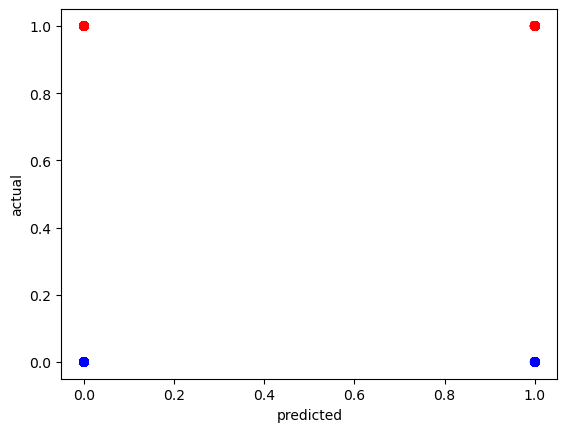

In [20]:
plt.figure()
plt.scatter(y_pred, test_y, c=test_y, cmap='bwr')
plt.xlabel('predicted')
plt.ylabel('actual')

C:\Users\saich\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


'Log Reg Precision: 0.875968992248062'

'Log Reg Recall: 0.26218097447795824'

'Log Reg F1: 0.40357142857142864'

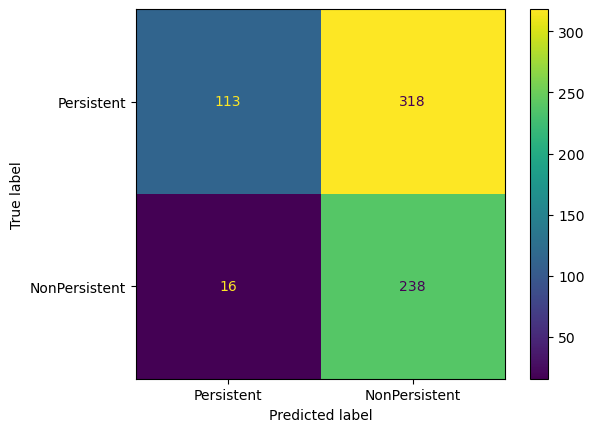

In [21]:
support = svm.LinearSVC(random_state=20)

# Train the model using the training sets and check score on test dataset
support.fit(train_X, train_y)
predicted= support.predict(test_X)
p, r, f, s =precision_recall_fscore_support(test_y,predicted)
display("Log Reg Precision: {}".format(p[0]))
display("Log Reg Recall: {}".format(r[0]))
display("Log Reg F1: {}".format(f[0]))

confusion_matrix = metrics.confusion_matrix(test_y, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Persistent', 'NonPersistent'])
cm_display.plot()
plt.show()

In [22]:
train_X = StandardScaler().fit_transform(train_X)
test_X = StandardScaler().fit_transform(test_X)

'Polynomial SVM Precision: 0.8004073319755601'

'Polynomial SVM Recall: 0.9118329466357309'

'Polynomial SVM F1: 0.8524945770065078'

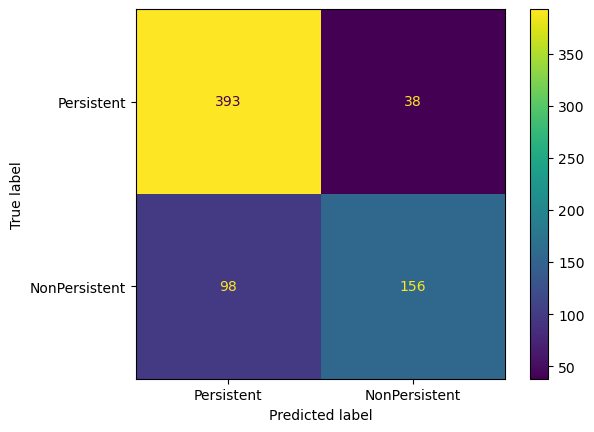

In [23]:
svmCLFpoly = svm.SVC(kernel='poly', class_weight='balanced', gamma='scale', degree=3)
svmCLFpoly.fit(train_X, train_y)#.values.ravel())

y_pred = svmCLFpoly.predict(test_X)
p, r, f, s = precision_recall_fscore_support(test_y, y_pred)#, labels=[1])
display("Polynomial SVM Precision: {}".format(p[0]))
display("Polynomial SVM Recall: {}".format(r[0]))
display("Polynomial SVM F1: {}".format(f[0]))

# Credit to w3schools for the confusion matrix code
confusion_matrix = metrics.confusion_matrix(test_y, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Persistent', 'NonPersistent'])
cm_display.plot()
plt.show()


'Polynomial SVM Precision: 0.8004073319755601'

'Polynomial SVM Recall: 0.9118329466357309'

'Polynomial SVM F1: 0.8524945770065078'

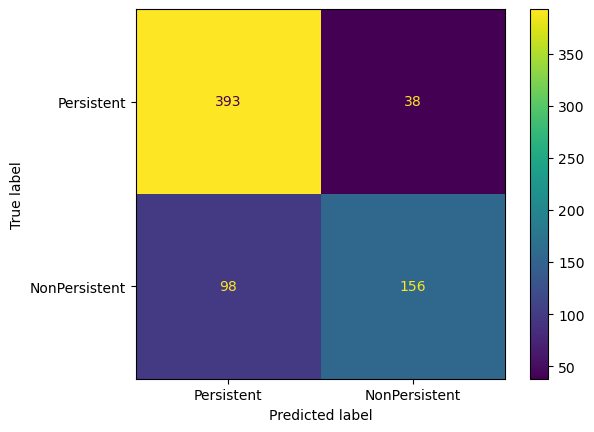

In [24]:
svmCLFpoly = svm.SVC(kernel='poly', class_weight='balanced', gamma='auto', degree=3,decision_function_shape='ovo')# ovr
svmCLFpoly.fit(train_X, train_y)#.values.ravel())

y_pred = svmCLFpoly.predict(test_X)
p, r, f, s = precision_recall_fscore_support(test_y, y_pred)#, labels=[1])
display("Polynomial SVM Precision: {}".format(p[0]))
display("Polynomial SVM Recall: {}".format(r[0]))
display("Polynomial SVM F1: {}".format(f[0]))

# Credit to w3schools for the confusion matrix code
confusion_matrix = metrics.confusion_matrix(test_y, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Persistent', 'NonPersistent'])
cm_display.plot()
plt.show()


'RBF SVM Precision: 0.7986425339366516'

'RBF SVM Recall: 0.8190255220417634'

'RBF SVM F1: 0.8087056128293242'

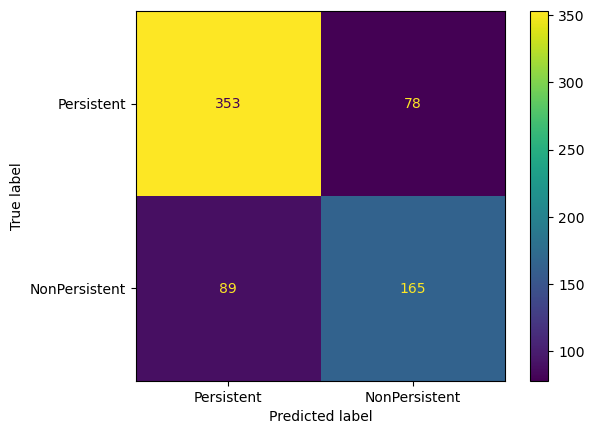

In [25]:
svmCLFrbf = svm.SVC(kernel='rbf', class_weight='balanced', gamma=.1)
svmCLFrbf.fit(train_X, train_y)

y_pred = svmCLFrbf.predict(test_X)
p, r, f, s = precision_recall_fscore_support(test_y, y_pred)
display("RBF SVM Precision: {}".format(p[0]))
display("RBF SVM Recall: {}".format(r[0]))
display("RBF SVM F1: {}".format(f[0]))

confusion_matrix = metrics.confusion_matrix(test_y, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Persistent', 'NonPersistent'])
cm_display.plot()
plt.show()


C:\Users\saich\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'RBF SVM Precision: 0.6291970802919709'

'RBF SVM Recall: 1.0'

'RBF SVM F1: 0.7724014336917563'

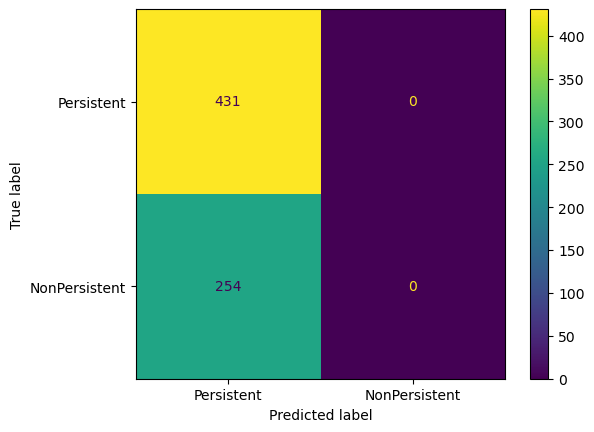

In [26]:
svmCLFrbf = svm.SVC(kernel='rbf', class_weight='balanced', gamma=1)
svmCLFrbf.fit(train_X, train_y)

y_pred = svmCLFrbf.predict(test_X)
p, r, f, s = precision_recall_fscore_support(test_y, y_pred)
display("RBF SVM Precision: {}".format(p[0]))
display("RBF SVM Recall: {}".format(r[0]))
display("RBF SVM F1: {}".format(f[0]))

confusion_matrix = metrics.confusion_matrix(test_y, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Persistent', 'NonPersistent'])
cm_display.plot()
plt.show()

C:\Users\saich\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'RBF SVM Precision: 0.6291970802919709'

'RBF SVM Recall: 1.0'

'RBF SVM F1: 0.7724014336917563'

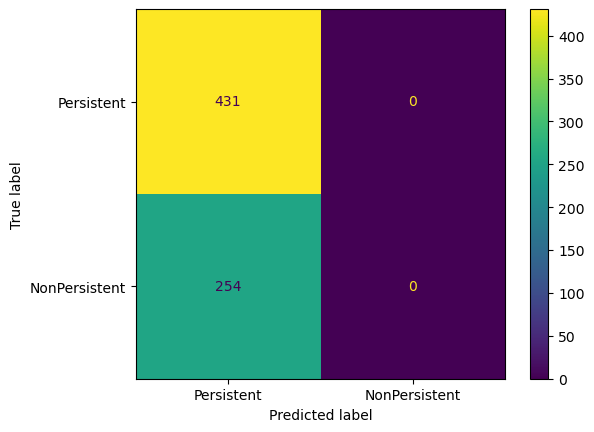

In [27]:
svmCLFrbf = svm.SVC(kernel='rbf', class_weight='balanced', gamma=10)
svmCLFrbf.fit(train_X, train_y)

y_pred = svmCLFrbf.predict(test_X)
p, r, f, s = precision_recall_fscore_support(test_y, y_pred)
display("RBF SVM Precision: {}".format(p[0]))
display("RBF SVM Recall: {}".format(r[0]))
display("RBF SVM F1: {}".format(f[0]))

confusion_matrix = metrics.confusion_matrix(test_y, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Persistent', 'NonPersistent'])
cm_display.plot()
plt.show()

'Linear SVM Precision: 0.8564356435643564'

'Linear SVM Recall: 0.802784222737819'

'Linear SVM F1: 0.8287425149700598'

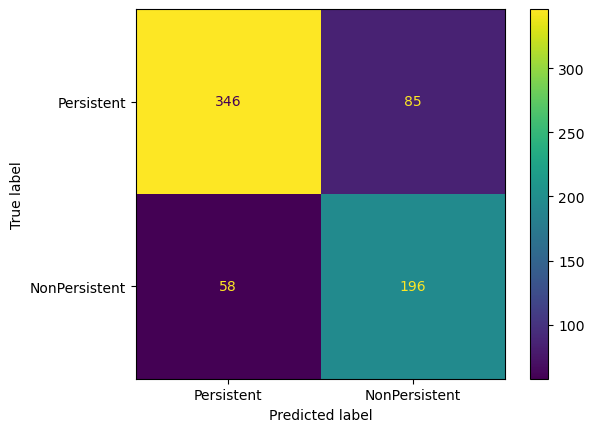

In [28]:
svmCLFlnr = svm.SVC(kernel='linear', class_weight='balanced', gamma='auto')
svmCLFlnr.fit(train_X, train_y)

y_pred = svmCLFlnr.predict(test_X)
p, r, f, s = precision_recall_fscore_support(test_y, y_pred)
display("Linear SVM Precision: {}".format(p[0]))
display("Linear SVM Recall: {}".format(r[0]))
display("Linear SVM F1: {}".format(f[0]))

# Credit to w3schools for the confusion matrix code
confusion_matrix = metrics.confusion_matrix(test_y, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Persistent', 'NonPersistent'])
cm_display.plot()
plt.show()
